In [2]:
# connect ot drive
# Step 2: Mount Google Drive (if using Google Drive for dataset/code)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMDB

In [4]:
features = ['Success_Label',
            'from_imdb_imdb_id',
            'daily_box_office_date_revenue_recorded',
            "from_imdb_daily_mean_rating",
            "from_imdb_daily_var_rating",
            "from_imdb_daily_min_rating",
            "from_imdb_daily_max_rating",
            "from_imdb_daily_number_of_ratings",
            "daily_box_office_DailyBoxOfficeRevenue",
            "daily_box_office_accumulated_DailyBoxOfficeRevenues_since_Realease",
            "daily_box_office_per theaters avg gross",
            "daily_box_office_Theaters_cleaned"
            ]

# Visualize load data
test_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/imdb/test.parquet"
train_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/imdb/train.parquet"
val_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/imdb/validation.parquet"
test_df = pd.read_parquet(test_path)
train_df = pd.read_parquet(train_path)
val_df = pd.read_parquet(val_path)
test_df = test_df[features]
train_df = train_df[features]
val_df = val_df[features]
print(train_df.info())
print(val_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66847 entries, 0 to 66846
Data columns (total 12 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Success_Label                                                       66847 non-null  int64         
 1   from_imdb_imdb_id                                                   66847 non-null  object        
 2   daily_box_office_date_revenue_recorded                              66847 non-null  datetime64[ns]
 3   from_imdb_daily_mean_rating                                         66847 non-null  float64       
 4   from_imdb_daily_var_rating                                          66847 non-null  float64       
 5   from_imdb_daily_min_rating                                          66847 non-null  float64       
 6   from_imdb_daily_max_rating                            

In [5]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

# sum up shapes to get overall distribution over splits
print(train_df.shape[0] + val_df.shape[0] + test_df.shape[0])
print(train_df.shape[1] + val_df.shape[1] + test_df.shape[1])

# concat splits to retrieve number movies
df = pd.concat([train_df, val_df, test_df])
print(len(df["from_imdb_imdb_id"].unique()))

print(df["Success_Label"].value_counts(normalize=True))


(66847, 12)
(14406, 12)
(15718, 12)
96971
36
1365
Success_Label
2    0.438543
1    0.349218
0    0.212239
Name: proportion, dtype: float64


# Rotten

In [6]:
features = ['Success_Label',
            'from_imdb_imdb_id',
            'daily_box_office_date_revenue_recorded',
            "rotten_review_score_encoded_mean",
            "rotten_review_score_encoded_var",
            "rotten_review_score_encoded_min",
            "rotten_review_score_encoded_max",
            "rotten_review_word_count_mean",
            "rotten_rating_sentiment_polarity_mean",
            "rotten_rating_sentiment_polarity_var",
            "rotten_rating_sentiment_polarity_min",
            "rotten_rating_sentiment_polarity_max",
            "daily_box_office_DailyBoxOfficeRevenue",
            "daily_box_office_per theaters avg gross",
            "daily_box_office_Theaters_cleaned"
            ]

# Visualize load data
test_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/rotten/test.parquet"
train_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/rotten/train.parquet"
val_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/rotten/validation.parquet"
test_df = pd.read_parquet(test_path)
train_df = pd.read_parquet(train_path)
val_df = pd.read_parquet(val_path)
test_df = test_df[features]
train_df = train_df[features]
val_df = val_df[features]
print(train_df.info())
print(val_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11727 entries, 0 to 11726
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Success_Label                            11727 non-null  int64         
 1   from_imdb_imdb_id                        11727 non-null  object        
 2   daily_box_office_date_revenue_recorded   11727 non-null  datetime64[ns]
 3   rotten_review_score_encoded_mean         11727 non-null  float64       
 4   rotten_review_score_encoded_var          11727 non-null  float64       
 5   rotten_review_score_encoded_min          11727 non-null  float64       
 6   rotten_review_score_encoded_max          11727 non-null  float64       
 7   rotten_review_word_count_mean            11727 non-null  float64       
 8   rotten_rating_sentiment_polarity_mean    11727 non-null  float32       
 9   rotten_rating_sentiment_polarity_var   

In [7]:

features = ['Success_Label',
            'from_imdb_imdb_id',
            'daily_box_office_date_revenue_recorded',
            "rotten_review_score_encoded_mean",
            "rotten_review_score_encoded_var",
            "rotten_review_score_encoded_min",
            "rotten_review_score_encoded_max",
            "rotten_review_word_count_mean",
            "rotten_rating_sentiment_polarity_mean",
            "rotten_rating_sentiment_polarity_var",
            "rotten_rating_sentiment_polarity_min",
            "rotten_rating_sentiment_polarity_max",
            "daily_box_office_DailyBoxOfficeRevenue",
            "daily_box_office_per theaters avg gross",
            "daily_box_office_Theaters_cleaned"
            ]

# picking an example movie where success_label is 0 (flop)
test_df[test_df["Success_Label"] == 0].head()

# create new df grouped by movie id and count the number of smaples per movie
df = test_df.groupby("from_imdb_imdb_id").count()
inception_df = val_df[val_df["from_imdb_imdb_id"] == "tt1375666"]
inception_df = inception_df.sort_values(by="daily_box_office_date_revenue_recorded", ascending=False)

master_commaned_df = train_df[train_df["from_imdb_imdb_id"] =="tt0311113"]
master_commaned_df = master_commaned_df.sort_values(by="daily_box_office_date_revenue_recorded", ascending=False)

feats = ["rotten_review_score_encoded_mean",
"rotten_review_word_count_mean",
"rotten_rating_sentiment_polarity_mean"]

<ipython-input-8-66295c409fda>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  greens = get_cmap("Greens", len(feats))
<ipython-input-8-66295c409fda>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reds = get_cmap("Reds", len(feats))


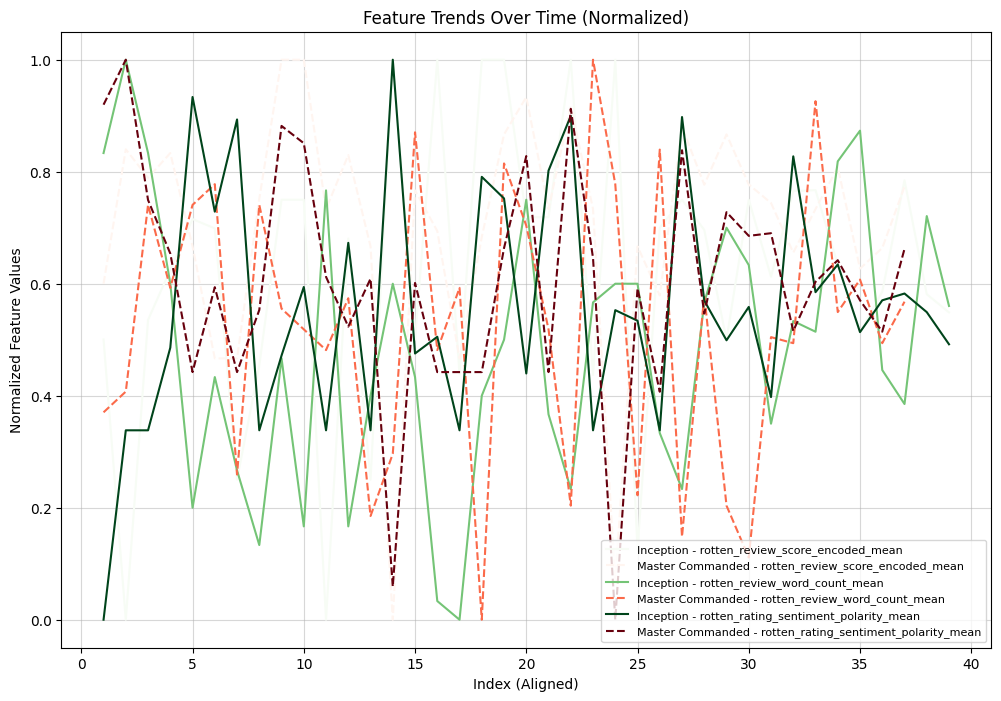

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

def plot_features_over_time(inception_df, master_commanded_df, feats):
    """
    Plot features over time for two movies: Inception (green lines) and Master Commanded (red lines).

    Parameters:
    - inception_df: DataFrame containing feature data for the movie Inception.
    - master_commanded_df: DataFrame containing feature data for the movie Master Commanded.
    - feats: List of feature column names to plot.

    Returns:
    - A matplotlib plot displaying the feature trends for the two movies.
    """
    plt.figure(figsize=(12, 8))

    # Normalize the data for comparability
    def normalize(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))

    # Generate color palettes
    greens = get_cmap("Greens", len(feats))
    reds = get_cmap("Reds", len(feats))

    for i, feat in enumerate(feats):
        # Normalize feature data
        inception_normalized = normalize(inception_df[feat])
        master_commanded_normalized = normalize(master_commanded_df[feat])

        # Plot for Inception
        plt.plot(
            range(1, len(inception_normalized) + 1),
            inception_normalized,
            label=f'Inception - {feat}',
            color=greens(i),
            linestyle='-'
        )

        # Plot for Master Commanded
        plt.plot(
            range(1, len(master_commanded_normalized) + 1),
            master_commanded_normalized,
            label=f'Master Commanded - {feat}',
            color=reds(i),
            linestyle='--'
        )

    plt.title("Feature Trends Over Time (Normalized)")
    plt.xlabel("Index (Aligned)")
    plt.ylabel("Normalized Feature Values")
    plt.legend(loc='best', fontsize=8)
    plt.grid(True, alpha=0.5)
    plt.show()

# Example usage:
plot_features_over_time(inception_df, master_commaned_df, feats)


In [88]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.cm import get_cmap

# def plot_features_over_time(inception_df, master_commanded_df, feats):
#     """
#     Plot features over time for two movies: Inception (green lines) and Master Commanded (red lines).

#     Parameters:
#     - inception_df: DataFrame containing feature data for the movie Inception.
#     - master_commanded_df: DataFrame containing feature data for the movie Master Commanded.
#     - feats: List of feature column names to plot.

#     Returns:
#     - Two matplotlib plots displaying the feature trends for the two movies separately.
#     """
#     # Normalize the data for comparability
#     def normalize(data):
#         return (data - np.min(data)) / (np.max(data) - np.min(data))

#     # Generate color palettes
#     greens = get_cmap("Greens", len(feats))
#     reds = get_cmap("Reds", len(feats))

#     # Plot for Inception
#     plt.figure(figsize=(12, 8))
#     for i, feat in enumerate(feats):
#         inception_normalized = normalize(inception_df[feat])
#         plt.plot(
#             range(1, len(inception_normalized) + 1),
#             inception_normalized,
#             label=f'Inception - {feat}',
#             color=greens(i),
#             linestyle='-'
#         )
#     plt.title("Feature Trends Over Time for Inception (Normalized)")
#     plt.xlabel("Index (Aligned)")
#     plt.ylabel("Normalized Feature Values")
#     plt.legend(loc='best', fontsize=8)
#     plt.grid(True, alpha=0.5)
#     plt.show()

#     # Plot for Master Commanded
#     plt.figure(figsize=(12, 8))
#     for i, feat in enumerate(feats):
#         master_commanded_normalized = normalize(master_commanded_df[feat])
#         plt.plot(
#             range(1, len(master_commanded_normalized) + 1),
#             master_commanded_normalized,
#             label=f'Master Commanded - {feat}',
#             color=reds(i),
#             linestyle='--'
#         )
#     plt.title("Feature Trends Over Time for Master Commanded (Normalized)")
#     plt.xlabel("Index (Aligned)")
#     plt.ylabel("Normalized Feature Values")
#     plt.legend(loc='best', fontsize=8)
#     plt.grid(True, alpha=0.5)
#     plt.show()

# # Example usage:
# plot_features_over_time(inception_df, master_commaned_df, feats)


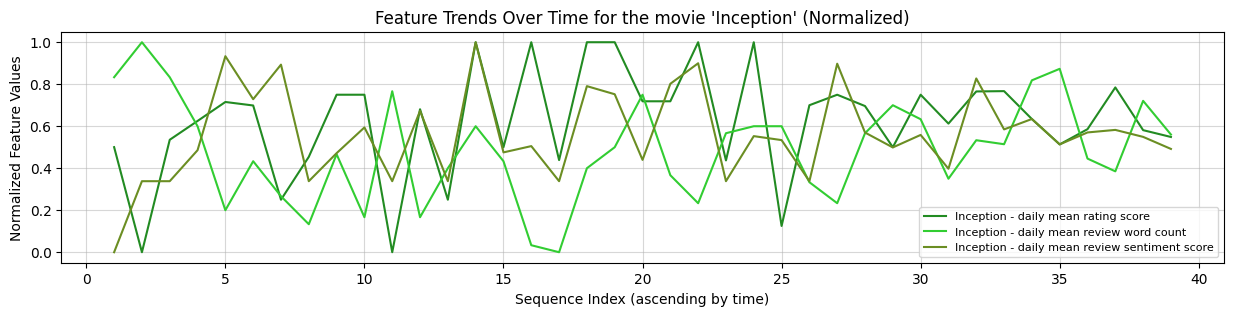

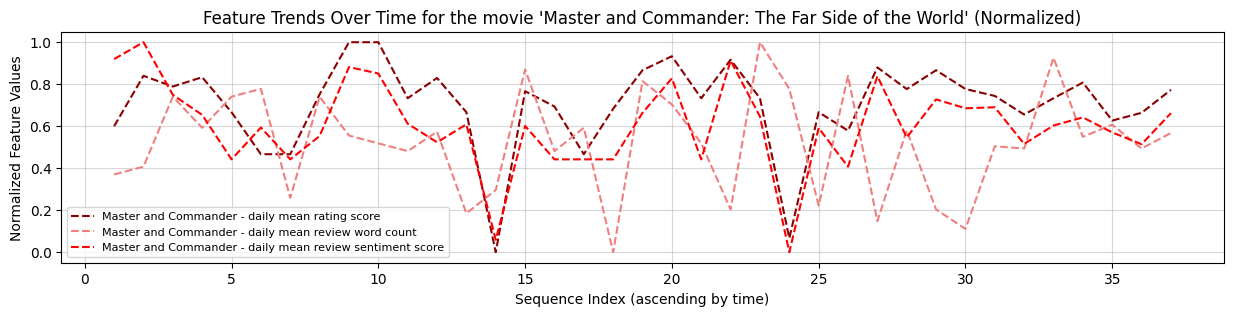

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features_over_time(inception_df, master_commanded_df, feats):
    """
    Plot features over time for two movies: Inception and Master Commanded with custom colors for features.

    Parameters:
    - inception_df: DataFrame containing feature data for the movie Inception.
    - master_commanded_df: DataFrame containing feature data for the movie Master Commanded.
    - feats: List of feature column names to plot.

    Returns:
    - Two matplotlib plots displaying the feature trends for the two movies separately.
    """
    # Normalize the data for comparability
    def normalize(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))

    # renaming the columns
    inception_df = inception_df.rename(columns={
                                            "rotten_review_score_encoded_mean": "daily mean rating score",
                                            "rotten_review_word_count_mean": "daily mean review word count",
                                            "rotten_rating_sentiment_polarity_mean": "daily mean review sentiment score"
                                            })

    master_commanded_df = master_commanded_df.rename(columns={
                                            "rotten_review_score_encoded_mean": "daily mean rating score",
                                            "rotten_review_word_count_mean": "daily mean review word count",
                                            "rotten_rating_sentiment_polarity_mean": "daily mean review sentiment score"
    })


    # Custom colors for features
    inception_colors = {
        "daily mean rating score": "forestgreen",
        "daily mean review word count": "limegreen",
        "daily mean review sentiment score": "olivedrab"
    }

    master_commanded_colors = {
        "daily mean rating score": "darkred",
        "daily mean review word count": "lightcoral",
        "daily mean review sentiment score": "red"
    }

    feats = ["daily mean rating score",
            "daily mean review word count",
            "daily mean review sentiment score"]

    # Plot for Inception
    plt.figure(figsize=(15, 3))
    for feat in feats:
        inception_normalized = normalize(inception_df[feat])
        plt.plot(
            range(1, len(inception_normalized) + 1),
            inception_normalized,
            label=f'Inception - {feat}',
            color=inception_colors[feat],
            linestyle='-'
        )
    plt.title("Feature Trends Over Time for the movie 'Inception' (Normalized)")
    plt.xlabel("Sequence Index (ascending by time)")
    plt.ylabel("Normalized Feature Values")
    plt.legend(loc='best', fontsize=8)
    plt.grid(True, alpha=0.5)
    plt.show()

    # Plot for Master Commanded
    plt.figure(figsize=(15, 3))
    for feat in feats:
        master_commanded_normalized = normalize(master_commanded_df[feat])
        plt.plot(
            range(1, len(master_commanded_normalized) + 1),
            master_commanded_normalized,
            label=f'Master and Commander - {feat}',
            color=master_commanded_colors[feat],
            linestyle='--'
        )
    plt.title("Feature Trends Over Time for the movie 'Master and Commander: The Far Side of the World' (Normalized)")
    plt.xlabel("Sequence Index (ascending by time)")
    plt.ylabel("Normalized Feature Values")
    plt.legend(loc='best', fontsize=8)
    plt.grid(True, alpha=0.5)
    plt.show()

# Example usage:
plot_features_over_time(inception_df, master_commaned_df, feats)


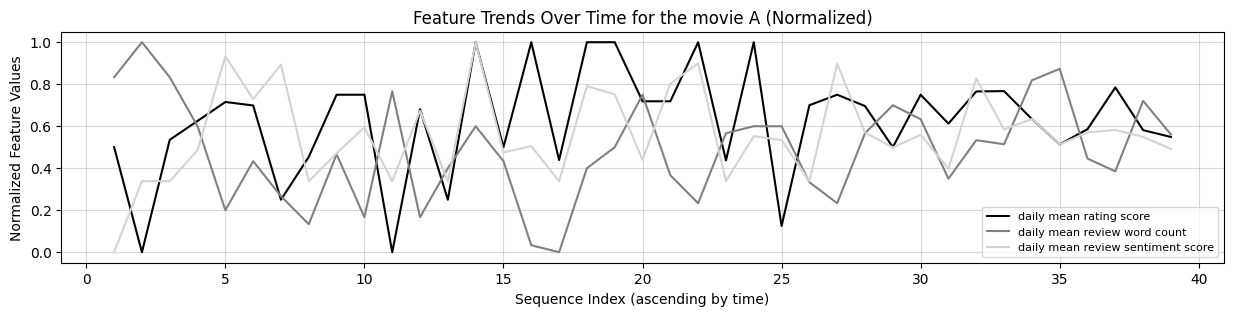

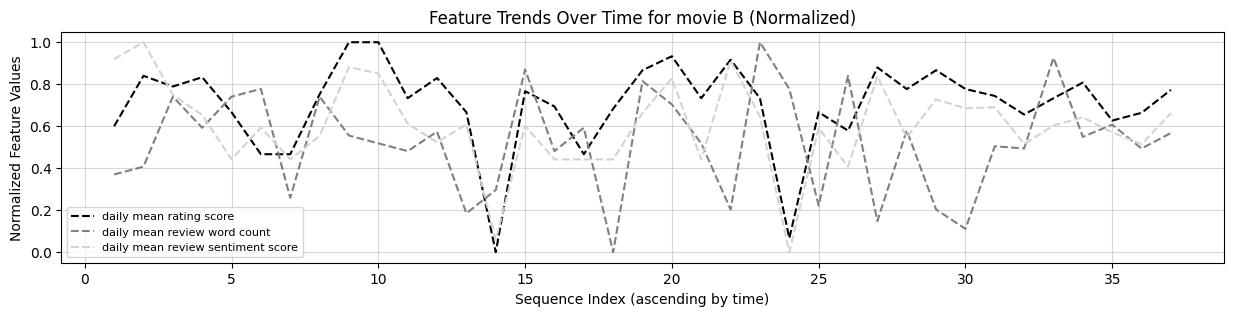

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features_over_time(inception_df, master_commanded_df, feats):
    """
    Plot features over time for two movies: Inception and Master Commanded with custom colors for features.

    Parameters:
    - inception_df: DataFrame containing feature data for the movie Inception.
    - master_commanded_df: DataFrame containing feature data for the movie Master Commanded.
    - feats: List of feature column names to plot.

    Returns:
    - Two matplotlib plots displaying the feature trends for the two movies separately.
    """
    # Normalize the data for comparability
    def normalize(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))

    # renaming the columns
    inception_df = inception_df.rename(columns={
                                            "rotten_review_score_encoded_mean": "daily mean rating score",
                                            "rotten_review_word_count_mean": "daily mean review word count",
                                            "rotten_rating_sentiment_polarity_mean": "daily mean review sentiment score"
                                            })

    master_commanded_df = master_commanded_df.rename(columns={
                                            "rotten_review_score_encoded_mean": "daily mean rating score",
                                            "rotten_review_word_count_mean": "daily mean review word count",
                                            "rotten_rating_sentiment_polarity_mean": "daily mean review sentiment score"
    })


    # Custom colors for features
    inception_colors = {
        "daily mean rating score": "black",
        "daily mean review word count": "grey",
        "daily mean review sentiment score": "lightgrey"
    }

    master_commanded_colors = {
        "daily mean rating score": "black",
        "daily mean review word count": "grey",
        "daily mean review sentiment score": "lightgrey"
    }

    feats = ["daily mean rating score",
            "daily mean review word count",
            "daily mean review sentiment score"]

    # Plot for Inception
    plt.figure(figsize=(15, 3))
    for feat in feats:
        inception_normalized = normalize(inception_df[feat])
        plt.plot(
            range(1, len(inception_normalized) + 1),
            inception_normalized,
            label=f'{feat}',
            color=inception_colors[feat],
            linestyle='-'
        )
    plt.title("Feature Trends Over Time for the movie A (Normalized)")
    plt.xlabel("Sequence Index (ascending by time)")
    plt.ylabel("Normalized Feature Values")
    plt.legend(loc='best', fontsize=8)
    plt.grid(True, alpha=0.5)
    plt.show()

    # Plot for Master Commanded
    plt.figure(figsize=(15, 3))
    for feat in feats:
        master_commanded_normalized = normalize(master_commanded_df[feat])
        plt.plot(
            range(1, len(master_commanded_normalized) + 1),
            master_commanded_normalized,
            label=f'{feat}',
            color=master_commanded_colors[feat],
            linestyle='--'
        )
    plt.title("Feature Trends Over Time for movie B (Normalized)")
    plt.xlabel("Sequence Index (ascending by time)")
    plt.ylabel("Normalized Feature Values")
    plt.legend(loc='best', fontsize=8)
    plt.grid(True, alpha=0.5)
    plt.show()

# Example usage:
plot_features_over_time(inception_df, master_commaned_df, feats)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features_over_time(inception_df, master_commanded_df, feats):
    """
    Plot features over time for two movies: Inception and Master Commanded with custom colors for features.

    Parameters:
    - inception_df: DataFrame containing feature data for the movie Inception.
    - master_commanded_df: DataFrame containing feature data for the movie Master Commanded.
    - feats: List of feature column names to plot.

    Returns:
    - Two matplotlib plots displaying the feature trends for the two movies separately.
    """
    # Normalize the data for comparability
    def normalize(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))

    # renaming the columns
    inception_df = inception_df.rename(columns={
                                            "rotten_review_score_encoded_mean": "daily mean rating score",
                                            "rotten_review_word_count_mean": "daily mean review word count",
                                            "rotten_rating_sentiment_polarity_mean": "daily mean review sentiment score"
                                            })

    master_commanded_df = master_commanded_df.rename(columns={
                                            "rotten_review_score_encoded_mean": "daily mean rating score",
                                            "rotten_review_word_count_mean": "daily mean review word count",
                                            "rotten_rating_sentiment_polarity_mean": "daily mean review sentiment score"
    })


    # Custom colors for features
    inception_colors = {
        "daily mean rating score": "forestgreen",
        "daily mean review word count": "limegreen",
        "daily mean review sentiment score": "olivedrab"
    }

    master_commanded_colors = {
        "daily mean rating score": "darkred",
        "daily mean review word count": "lightcoral",
        "daily mean review sentiment score": "red"
    }

    feats = ["daily mean rating score",
            "daily mean review word count",
            "daily mean review sentiment score"]

    # Plot for Inception
    plt.figure(figsize=(15, 3))
    for feat in feats:
        inception_normalized = normalize(inception_df[feat])
        plt.plot(
            range(1, len(inception_normalized) + 1),
            inception_normalized,
            label=f'Inception - {feat}',
            color=inception_colors[feat],
            linestyle='-'
        )
    plt.title("Feature Trends Over Time for the movie 'Inception' (Normalized)")
    plt.xlabel("Sequence Index (ascending by time)")
    plt.ylabel("Normalized Feature Values")
    plt.legend(loc='best', fontsize=8)
    plt.grid(True, alpha=0.5)
    plt.show()

    # Plot for Master Commanded
    plt.figure(figsize=(15, 3))
    for feat in feats:
        master_commanded_normalized = normalize(master_commanded_df[feat])
        plt.plot(
            range(1, len(master_commanded_normalized) + 1),
            master_commanded_normalized,
            label=f'Master and Commander - {feat}',
            color=master_commanded_colors[feat],
            linestyle='--'
        )
    plt.title("Feature Trends Over Time for the movie 'Master and Commander: The Far Side of the World' (Normalized)")
    plt.xlabel("Sequence Index (ascending by time)")
    plt.ylabel("Normalized Feature Values")
    plt.legend(loc='best', fontsize=8)
    plt.grid(True, alpha=0.5)
    plt.show()

# Example usage:
plot_features_over_time(inception_df, master_commaned_df, feats)


In [64]:
# selecting a movie that flopped with a very large budget
flops = val_df[val_df["Success_Label"] == 0]
#flops[flops["rotten_review_score_encoded_mean"]>=0.9]
flop_movie = val_df[val_df["from_imdb_imdb_id"] == "tt4954522"].shape

flop_movie

(0, 15)

In [65]:
# selecting a movie that flopped with a very large budget
flops = test_df[test_df["Success_Label"] == 0]
#flops[flops["rotten_review_score_encoded_mean"]>=0.9]
flop_movie = test_df[test_df["from_imdb_imdb_id"] == "tt4954522"].shape

flop_movie

(0, 15)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

# sum up shapes to get overall distribution over splits
print(train_df.shape[0] + val_df.shape[0] + test_df.shape[0])
print(train_df.shape[1] + val_df.shape[1] + test_df.shape[1])
# concat splits to retrieve number movies
df = pd.concat([train_df, val_df, test_df])
print(len(df["from_imdb_imdb_id"].unique()))

print(df["Success_Label"].value_counts(normalize=True))


(11727, 15)
(2470, 15)
(2490, 15)
16687
45
450
Success_Label
2    0.470546
1    0.285911
0    0.243543
Name: proportion, dtype: float64


# Twitter

In [ ]:
features = ['Success_Label',
            'from_imdb_imdb_id',
            'daily_box_office_date_revenue_recorded',
            "twitter_rating_mean",
            "twitter_rating_min",
            "twitter_rating_max",
            "twitter_number_users",
            "daily_box_office_DailyBoxOfficeRevenue",
            "daily_box_office_accumulated_DailyBoxOfficeRevenues_since_Realease",
            "daily_box_office_per theaters avg gross",
            "daily_box_office_Theaters_cleaned"
            ]

# Visualize load data
test_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/twitter/test.parquet"
train_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/twitter/train.parquet"
val_path = "/content/drive/MyDrive/Colab Notebooks/work_project/modelling_new/data/twitter/validation.parquet"
test_df = pd.read_parquet(test_path)
train_df = pd.read_parquet(train_path)
val_df = pd.read_parquet(val_path)
test_df = test_df[features]
train_df = train_df[features]
val_df = val_df[features]
print(train_df.info())
print(val_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18943 entries, 0 to 18942
Data columns (total 11 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Success_Label                                                       18943 non-null  int64         
 1   from_imdb_imdb_id                                                   18943 non-null  object        
 2   daily_box_office_date_revenue_recorded                              18943 non-null  datetime64[ns]
 3   twitter_rating_mean                                                 18943 non-null  float64       
 4   twitter_rating_min                                                  18943 non-null  int64         
 5   twitter_rating_max                                                  18943 non-null  int64         
 6   twitter_number_users                                  

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

# sum up shapes to get overall distribution over splits
print(train_df.shape[0] + val_df.shape[0] + test_df.shape[0])
print(train_df.shape[1] + val_df.shape[1] + test_df.shape[1])
# concat splits to retrieve number movies
df = pd.concat([train_df, val_df, test_df])
print(len(df["from_imdb_imdb_id"].unique()))

# check distribution of target labels per split in %
print(df["Success_Label"].value_counts(normalize=True))
print(val_df["Success_Label"].value_counts(normalize=True))
print(test_df["Success_Label"].value_counts(normalize=True))

(18943, 11)
(3904, 11)
(4001, 11)
26848
33
393
Success_Label
2    0.672676
1    0.283522
0    0.043802
Name: proportion, dtype: float64
Success_Label
2    0.682889
1    0.276895
0    0.040215
Name: proportion, dtype: float64
Success_Label
2    0.637091
1    0.312422
0    0.050487
Name: proportion, dtype: float64
